Stock Portfolio Analysis

In [15]:
# Import libaries

import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
# from MCForecastTools import MCSimulation
%matplotlib inline

In [16]:
# Check dotenv loaded correctly

load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

In [17]:
# Set current amount of shares data

shares_data = {
    "shares": [10, 201, 210, 156, 2, 50, 1, 1, 1, 1, 35]
}

# Set the tickers

tickers = ["TNXP", "SNDL", "HYLN", "GOEV", "COIN", "MNMD", "PLTR", "RIOT", "CHPT", "QS", "IDEX"]

# Create the shares DataFrame

df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data

df_shares

shares
TNXP      10
SNDL     201
HYLN     210
GOEV     156
COIN       2
MNMD      50
PLTR       1
RIOT       1
CHPT       1
QS         1
IDEX      35

In [18]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [19]:
# Verify that Alpaca key and secret were correctly loaded

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [20]:
# Create the Alpaca API object

alpaca = trade_api.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [37]:
# Format current date as ISO format

today = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

In [38]:
# Set timeframe to one day ('1D') for the Alpaca API

timeframe = "1D"

In [39]:
# Get current price data for Stocks

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data

df_portfolio

CHPT                                  COIN  \
                            open   high    low  close   volume    open   
2021-08-04 00:00:00-04:00  23.41  23.93  23.03  23.21  4098757  231.01   

                                                              ...    SNDL  \
                               high     low   close   volume  ...    open   
2021-08-04 00:00:00-04:00  245.4683  229.85  244.35  3471922  ...  0.8053   

                                                           TNXP          \
                             high   low   close    volume  open    high   
2021-08-04 00:00:00-04:00  0.8063  0.78  0.7815  88304849  0.69  0.6926   

                                                  
                              low close   volume  
2021-08-04 00:00:00-04:00  0.6533  0.66  9643241  

[1 rows x 55 columns]

In [40]:
# Fetch the current closing prices from the DataFrame

tnxp_price = float(df_portfolio["TNXP"]["close"])
sndl_price = float(df_portfolio["SNDL"]["close"])
hyln_price = float(df_portfolio["HYLN"]["close"])
goev_price = float(df_portfolio["GOEV"]["close"])
coin_price = float(df_portfolio["COIN"]["close"])
mnmd_price = float(df_portfolio["MNMD"]["close"])
pltr_price = float(df_portfolio["PLTR"]["close"])
riot_price = float(df_portfolio["RIOT"]["close"])
chpt_price = float(df_portfolio["CHPT"]["close"])
qs_price = float(df_portfolio["QS"]["close"])
idex_price = float(df_portfolio["IDEX"]["close"])

In [41]:
# Compute the current value in dollars of the stock portfolio

tnxp_value = tnxp_price * df_shares.loc["TNXP"]["shares"]
sndl_value = sndl_price * df_shares.loc["SNDL"]["shares"]
hyln_value = hyln_price * df_shares.loc["HYLN"]["shares"]
goev_value = goev_price * df_shares.loc["GOEV"]["shares"]
coin_value = coin_price * df_shares.loc["COIN"]["shares"]
mnmd_value = mnmd_price * df_shares.loc["MNMD"]["shares"]
pltr_value = pltr_price * df_shares.loc["PLTR"]["shares"]
riot_value = riot_price * df_shares.loc["RIOT"]["shares"]
chpt_value = chpt_price * df_shares.loc["CHPT"]["shares"]
qs_value = qs_price * df_shares.loc["QS"]["shares"]
idex_value = idex_price * df_shares.loc["IDEX"]["shares"]

# Print the current value of the portfolio

print(f"The current value of the {df_shares.loc['TNXP']['shares']} TNXP shares is ${tnxp_value:0.2f}")
print(f"The current value of the {df_shares.loc['SNDL']['shares']} SNDL shares is ${sndl_value:0.2f}")
print(f"The current value of the {df_shares.loc['HYLN']['shares']} HYLN shares is ${hyln_value:0.2f}")
print(f"The current value of the {df_shares.loc['GOEV']['shares']} GOEV shares is ${goev_value:0.2f}")
print(f"The current value of the {df_shares.loc['COIN']['shares']} COIN shares is ${coin_value:0.2f}")
print(f"The current value of the {df_shares.loc['MNMD']['shares']} MNMD shares is ${mnmd_value:0.2f}")
print(f"The current value of the {df_shares.loc['PLTR']['shares']} PLTR shares is ${pltr_value:0.2f}")
print(f"The current value of the {df_shares.loc['RIOT']['shares']} RIOT shares is ${riot_value:0.2f}")
print(f"The current value of the {df_shares.loc['CHPT']['shares']} CHPT shares is ${chpt_value:0.2f}")
print(f"The current value of the {df_shares.loc['QS']['shares']} QS shares is ${qs_value:0.2f}")
print(f"The current value of the {df_shares.loc['IDEX']['shares']} IDEX shares is ${idex_value:0.2f}")


The current value of the 10 TNXP shares is $6.60
The current value of the 201 SNDL shares is $157.08
The current value of the 210 HYLN shares is $2001.30
The current value of the 156 GOEV shares is $1190.28
The current value of the 2 COIN shares is $488.70
The current value of the 50 MNMD shares is $145.50
The current value of the 1 PLTR shares is $22.30
The current value of the 1 RIOT shares is $32.60
The current value of the 1 CHPT shares is $23.21
The current value of the 1 QS shares is $21.97
The current value of the 35 IDEX shares is $80.85


In [42]:
# Set the data for the shares value DataFrame

value_data = {
    "TNXP": [tnxp_value],
    "SNDL": [sndl_value],
    "HYLN": [hyln_value],
    "GOEV": [goev_value],
    "COIN": [coin_value],
    "MNMD": [mnmd_value],
    "PLTR": [pltr_value],
    "RIOT": [riot_value],
    "CHPT": [chpt_value],
    "QS": [qs_value],
    "IDEX": [idex_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

TNXP      SNDL    HYLN     GOEV   COIN   MNMD  PLTR  RIOT   CHPT     QS  \
0   6.6  157.0815  2001.3  1190.28  488.7  145.5  22.3  32.6  23.21  21.97   

    IDEX  
0  80.85

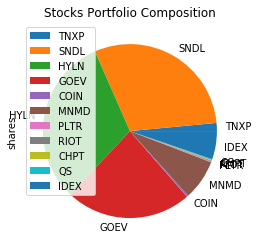

In [43]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

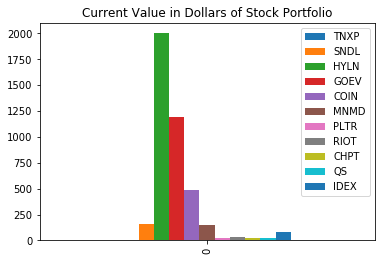

In [44]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")